In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
#Load and Clean Data
stock = "ZOMATO.NS" #change the symbol to change the stock
start_date = dt.datetime.today() - dt.timedelta(days=365*7)
end_date = dt.datetime.today() - dt.timedelta(days=30)
data = yf.download(stock, start=start_date, end=end_date)
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,,
2021-07-23,126.000000,138.899994,115.000000,116.000000,694895290
2021-07-26,140.649994,143.750000,125.300003,126.349998,249723854
2021-07-27,132.899994,147.800003,127.750000,141.699997,240341900
2021-07-28,131.199997,135.000000,123.550003,131.000000,159793731
2021-07-29,141.550003,144.000000,132.199997,134.949997,117973089
...,...,...,...,...,...
2025-02-24,222.690002,227.800003,219.979996,219.979996,43335473
2025-02-25,225.630005,230.179993,223.050003,224.199997,48478366


In [3]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
count,894.000000,894.000000,894.000000,894.000000,8.940000e+02
mean,130.127595,132.962819,127.462819,130.387740,6.456179e+07
std,72.022900,73.325655,70.646650,72.040681,6.711028e+07
min,41.650002,44.400002,40.599998,40.849998,0.000000e+00
25%,65.250000,66.962502,64.012501,65.462498,3.190383e+07
50%,116.500000,119.000000,114.250000,116.950001,4.713776e+07
75%,182.145004,185.225002,178.849998,182.450001,7.161956e+07
max,302.950012,304.700012,296.250000,304.700012,6.948953e+08


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894 entries, 2021-07-23 to 2025-03-03
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, ZOMATO.NS)   894 non-null    float64
 1   (High, ZOMATO.NS)    894 non-null    float64
 2   (Low, ZOMATO.NS)     894 non-null    float64
 3   (Open, ZOMATO.NS)    894 non-null    float64
 4   (Volume, ZOMATO.NS)  894 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 41.9 KB


In [5]:
data = data.dropna()
data

Price,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,,
2021-07-23,126.000000,138.899994,115.000000,116.000000,694895290
2021-07-26,140.649994,143.750000,125.300003,126.349998,249723854
2021-07-27,132.899994,147.800003,127.750000,141.699997,240341900
2021-07-28,131.199997,135.000000,123.550003,131.000000,159793731
2021-07-29,141.550003,144.000000,132.199997,134.949997,117973089
...,...,...,...,...,...
2025-02-24,222.690002,227.800003,219.979996,219.979996,43335473
2025-02-25,225.630005,230.179993,223.050003,224.199997,48478366


In [6]:
#Split train and test data 
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [7]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[['Close']])
test_scaled = scaler.transform(test_data[['Close']])

In [8]:
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

In [9]:
#Build and train LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0988 - val_loss: 0.2148
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0096 - val_loss: 0.0144
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0052 - val_loss: 0.0096
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0032 - val_loss: 0.0098
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0036 - val_loss: 0.0083
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0033 - val_loss: 0.0077
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0040 - val_loss: 0.0092
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 0.0075
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0029 - val_loss: 0.0126
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0031 - val_loss: 0.0080
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0026 - val_loss: 0.0067
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0023 - val_l

In [10]:
# Step 6: Predict Future Values (Fixed for Data Leakage Issues)
future_days = 30
future_predictions = []
last_n_days = X_test[-1].reshape(1, seq_length, 1)  # Use last available sequence

for _ in range(future_days):
    next_price = model.predict(last_n_days)[0][0]
    future_predictions.append(next_price)
    last_n_days = np.append(last_n_days[:, 1:, :], [[[next_price]]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━

In [11]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [12]:
future_dates = [(dt.datetime.today() - dt.timedelta(days=30)) + dt.timedelta(days=i) for i in range(1, future_days+1)]

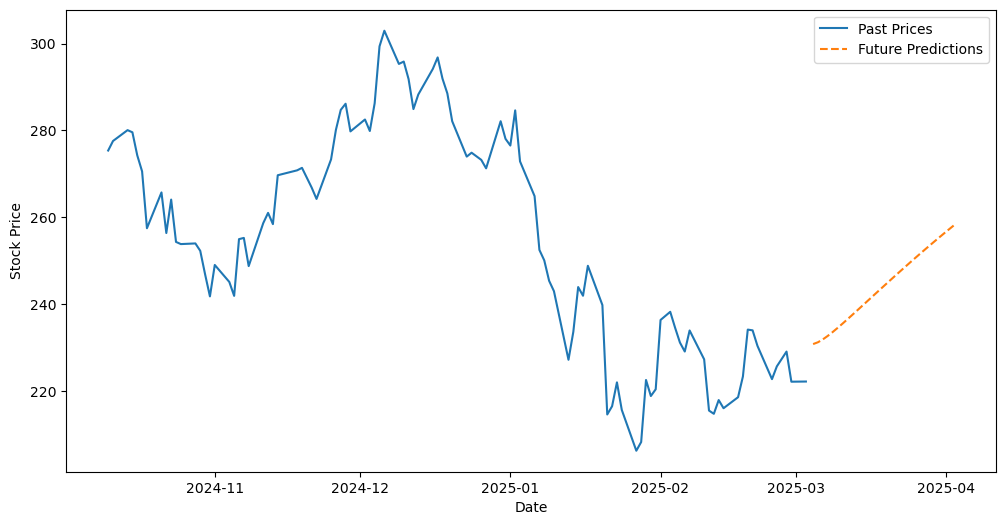

In [13]:
plt.figure(figsize=(12,6))
plt.plot(data.index[-100:], data['Close'].iloc[-100:], label="Past Prices")
plt.plot(future_dates, future_predictions, label="Future Predictions", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

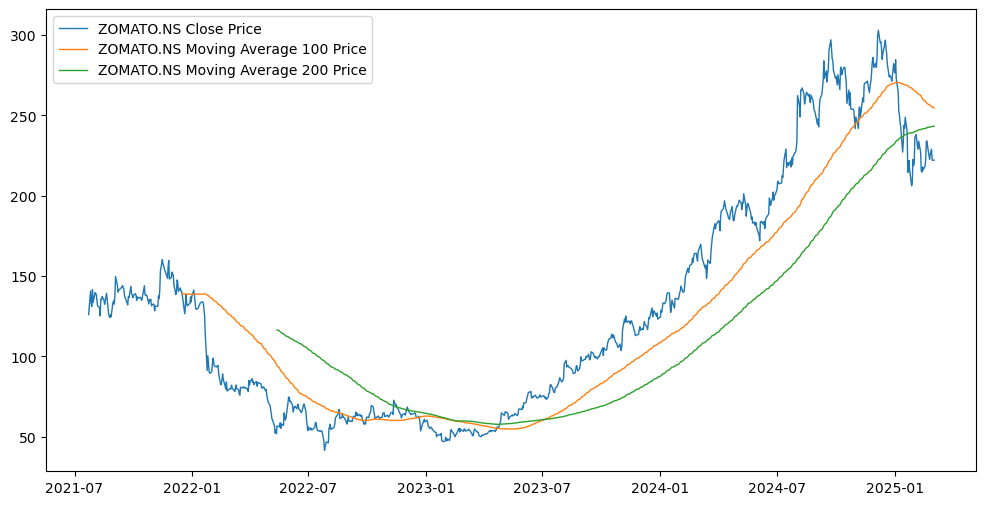

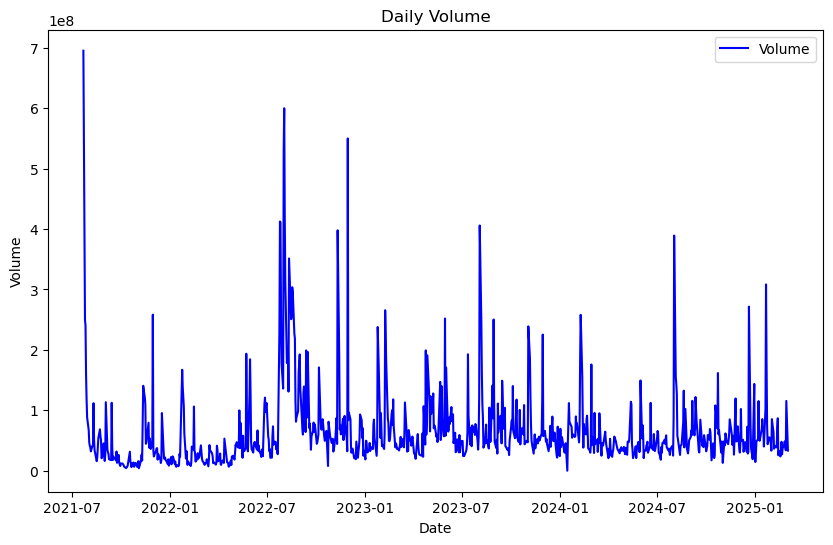

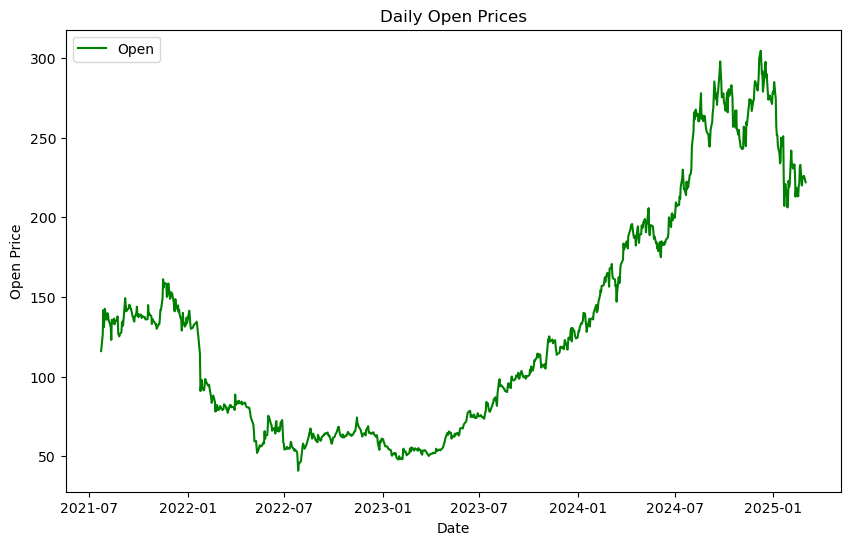

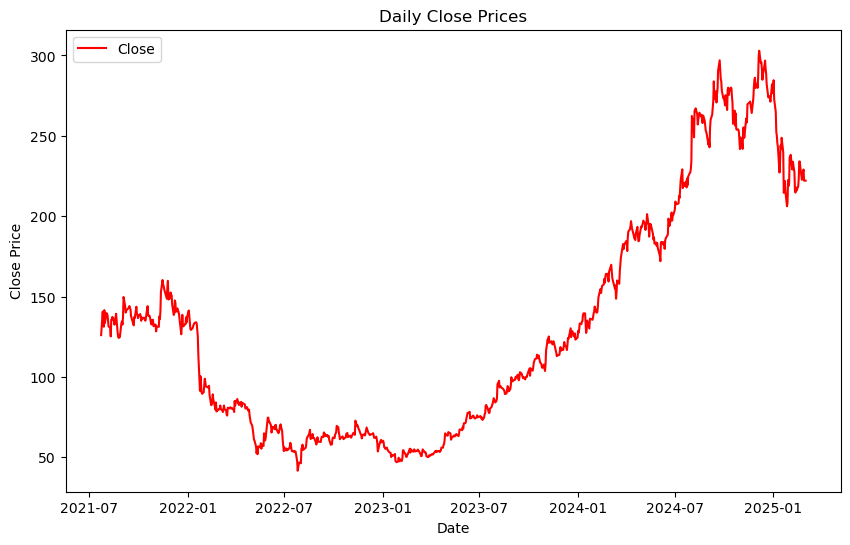

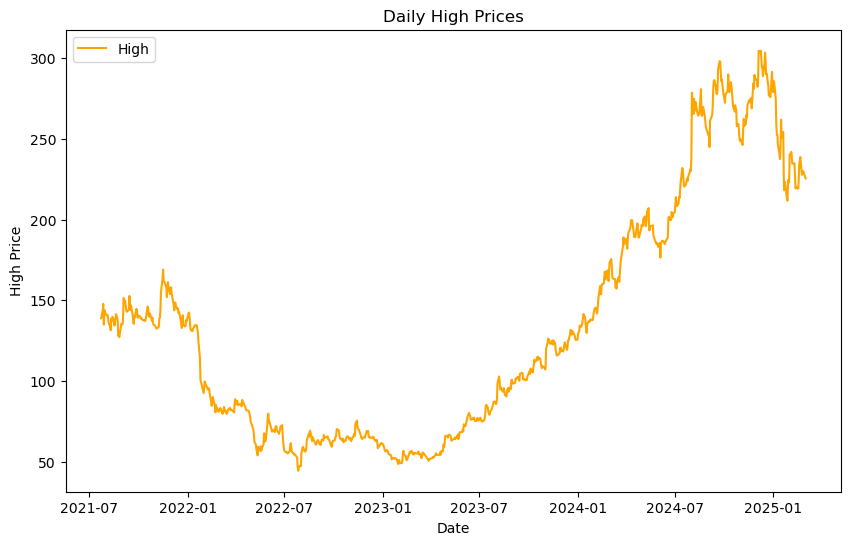

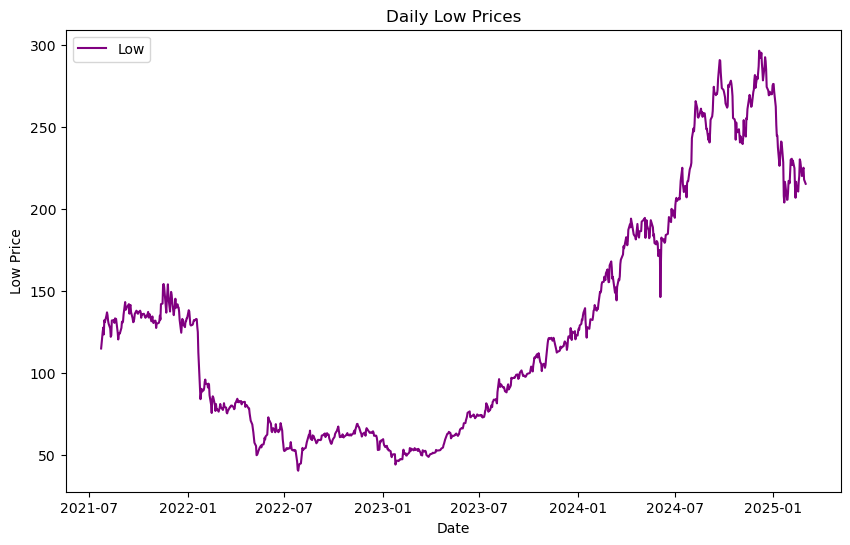